In [2]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime,date
import haversine
from haversine import haversine, Unit


In [3]:
train = pd.read_csv('W22P1_train.csv')
test = pd.read_csv('W22P1_test.csv')

In [4]:
train.head()

,id,pickup_date,pickup_time,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,0,2016-01-07,19:32:15,1,-73.986389,40.756615,-73.999794,40.761631,520
1,1,2016-01-27,08:07:32,1,-73.956039,40.767609,-73.968201,40.786690,989
2,2,2016-01-31,13:52:55,1,-73.975998,40.751137,-74.001854,40.735229,657
3,3,2016-01-19,08:00:19,3,-73.960121,40.781952,-73.971970,40.755039,1035
4,4,2016-01-25,23:32:14,1,-73.987434,40.760139,-73.990982,40.744862,621


In [4]:
train.describe()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,2.036933,-73.972713,40.751003,-73.973429,40.752164,995.474867
std,8660.398374,1.634296,0.039271,0.028957,0.036216,0.032406,4097.129209
min,0.000000,0.000000,-74.199020,40.398251,-74.613113,40.452099,2.000000
25%,7499.750000,1.000000,-73.991600,40.737307,-73.991119,40.736571,386.000000
50%,14999.500000,1.000000,-73.981499,40.754599,-73.979656,40.754848,634.000000
75%,22499.250000,2.000000,-73.966825,40.768730,-73.963089,40.769998,1019.000000
max,29999.000000,6.000000,-73.553513,41.687519,-72.671150,41.687519,86356.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30000 non-null  int64  
 1   pickup_date        30000 non-null  object 
 2   pickup_time        30000 non-null  object 
 3   passenger_count    30000 non-null  int64  
 4   pickup_longitude   30000 non-null  float64
 5   pickup_latitude    30000 non-null  float64
 6   dropoff_longitude  30000 non-null  float64
 7   dropoff_latitude   30000 non-null  float64
 8   trip_duration      30000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 2.1+ MB


C:\Users\Ivy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

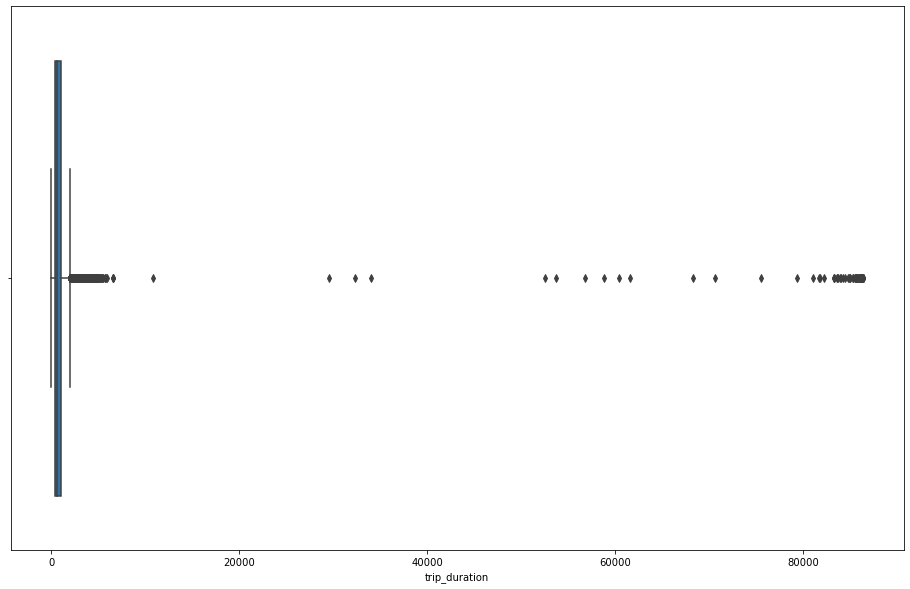

In [6]:
sns.boxplot(train['trip_duration'])

In [7]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

In [11]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

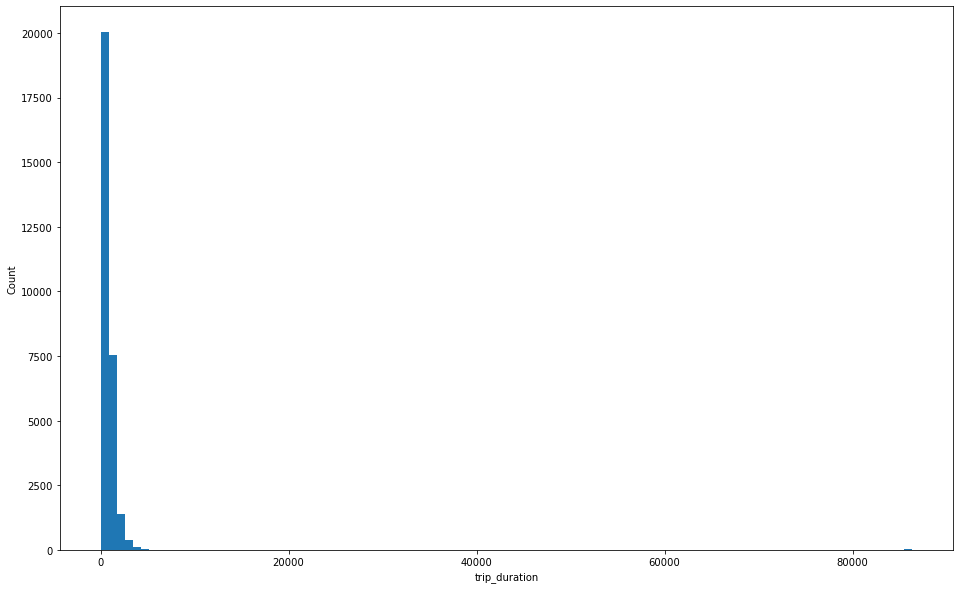

In [12]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('Count')
plt.show()

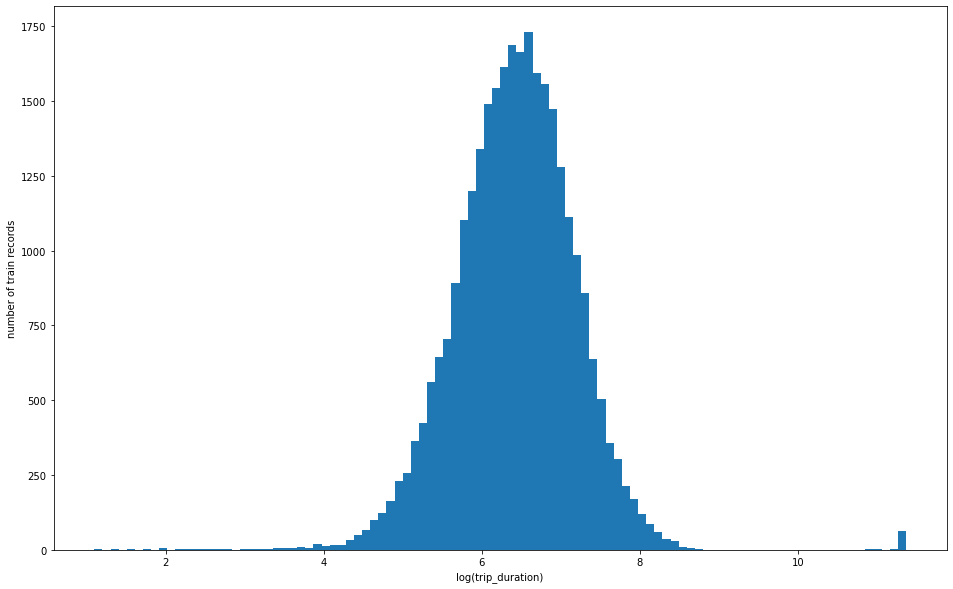

C:\Users\Ivy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_trip_duration', ylabel='Density'>

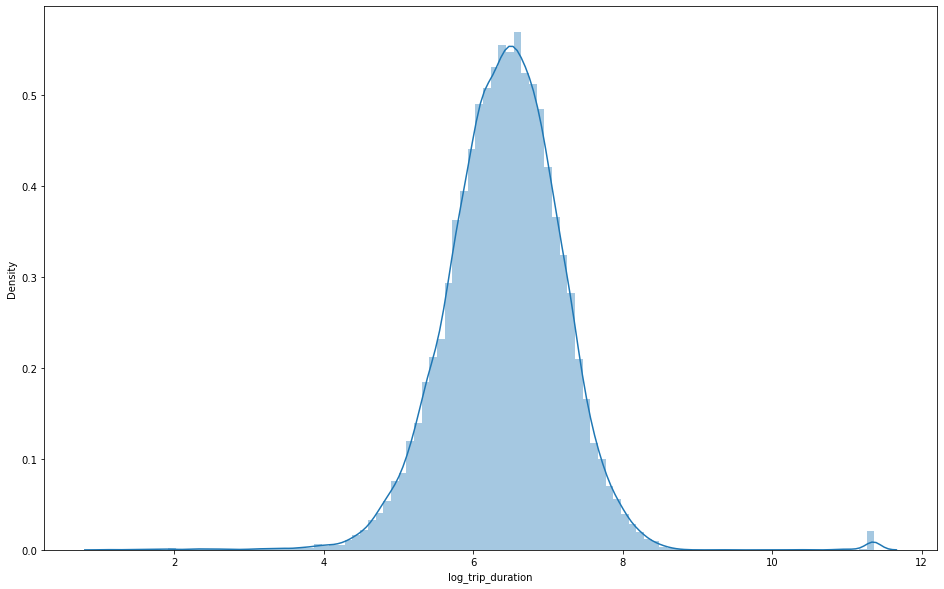

In [13]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
sns.distplot(train["log_trip_duration"], bins =100)

In [14]:
mean = np.mean(train['log_trip_duration'])
sd = np.std(train['log_trip_duration'])
train = train[train['log_trip_duration'] <= mean + 3*sd]
train = train[train['log_trip_duration'] >= mean - 3*sd]

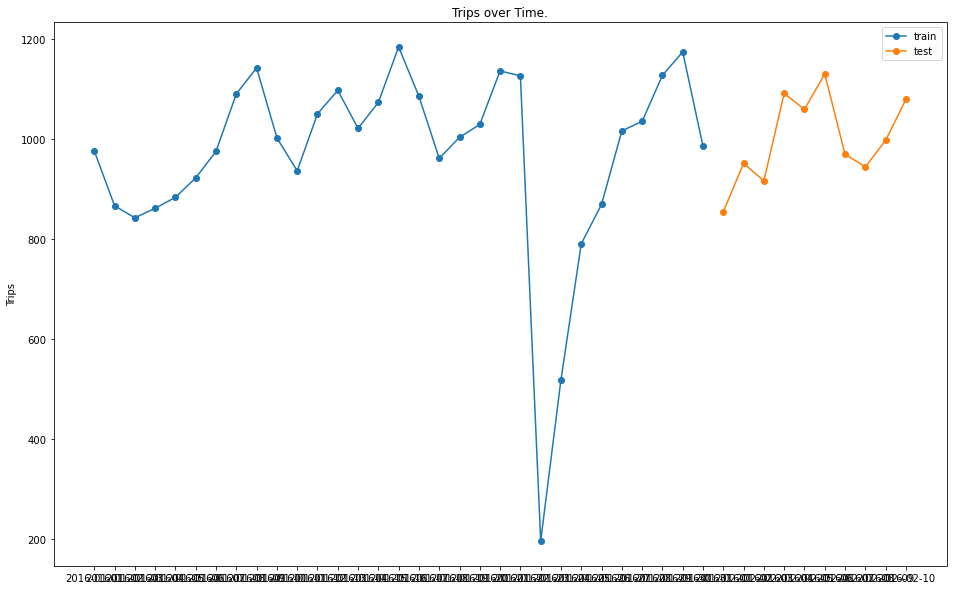

In [7]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

No handles with labels found to put in legend.
C:\Users\Ivy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Time duration for different passenger number'}, xlabel='passenger_count', ylabel='Time in Seconds'>

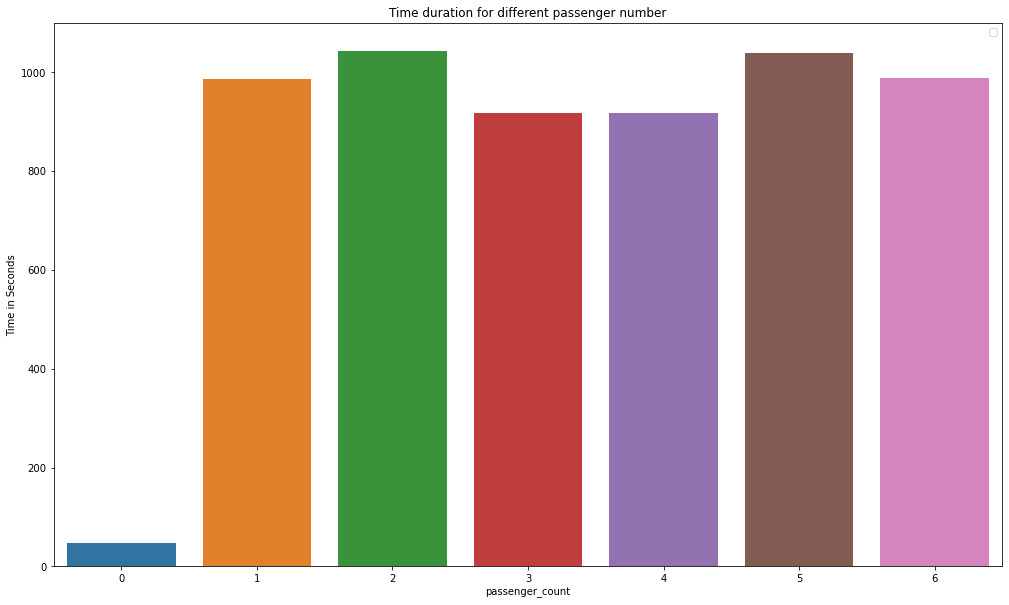

In [8]:
pc = train.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time duration for different passenger number')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(pc.index,pc.values)

In [9]:
train.groupby('passenger_count').size()

passenger_count
0        1
1    18426
2     4506
3     1416
4      646
5     3192
6     1813
dtype: int64

In [18]:
test.groupby('passenger_count').size()

passenger_count
1    6250
2    1460
3     447
4     206
5    1012
6     625
dtype: int64

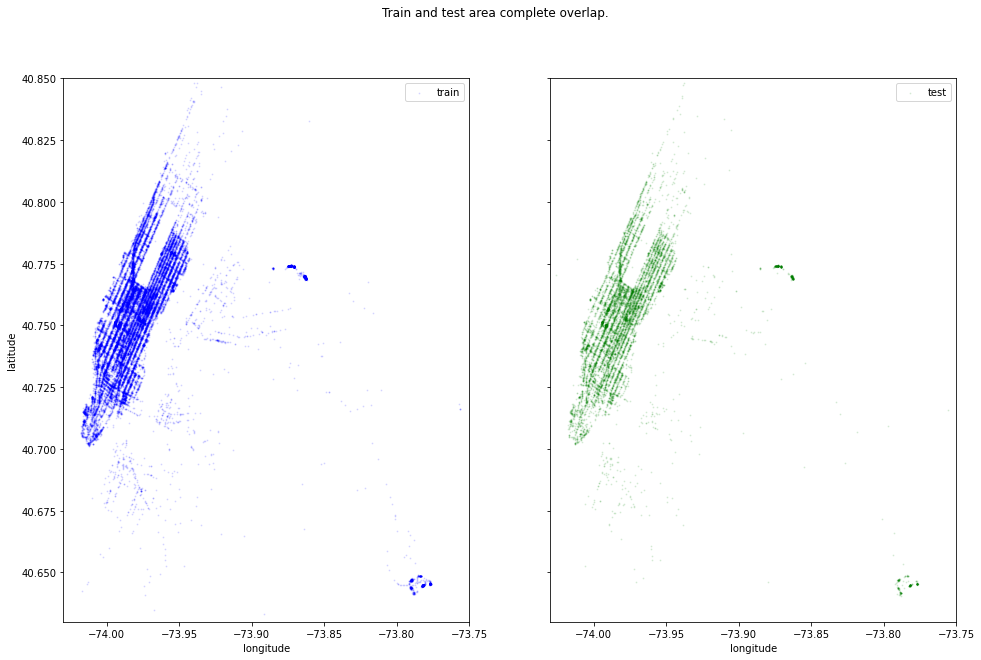

In [23]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:100000], train['pickup_latitude'].values[:100000],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:100000], test['pickup_latitude'].values[:100000],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [17]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

In [18]:
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000).fit(coords[sample_ind])

In [19]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])


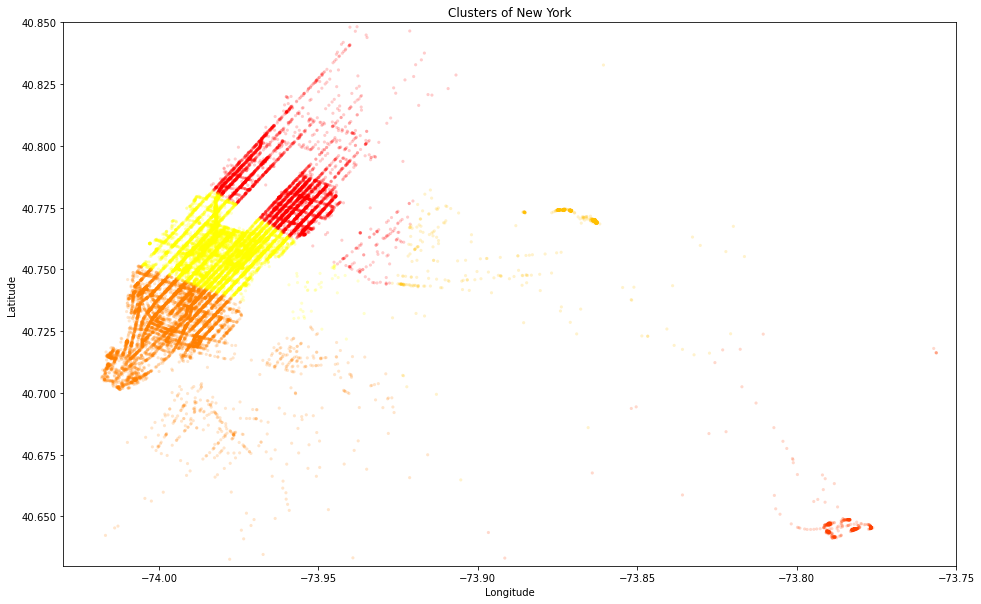

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Clusters of New York')
plt.show()

In [21]:
dtrain = pd.DataFrame({'Joined date': pd.to_datetime(train['pickup_date']),'Joined time': pd.to_datetime(train['pickup_time'])})

dtest = pd.DataFrame({'Joined date': pd.to_datetime(test['pickup_date']),'Joined time': pd.to_datetime(test['pickup_time'])})


In [22]:
train['year'] = dtrain['Joined date'].dt.year
test['year'] = dtest['Joined date'].dt.year
train.groupby('year').size(),test.groupby('year').size()

(year
 2016    29531
 dtype: int64,
 year
 2016    10000
 dtype: int64)

In [23]:
#Extracting Month
train['month'] = dtrain['Joined date'].dt.month
test['month'] = dtest['Joined date'].dt.month
train.groupby('month').size(),test.groupby('month').size()


(month
 1    29531
 dtype: int64,
 month
 2    10000
 dtype: int64)

In [24]:
train['day'] = dtrain['Joined date'].dt.day
test['day'] = dtest['Joined date'].dt.day
len(train.groupby('day').size()),len(test.groupby('day').size())

(31, 10)

In [25]:
train['hour'] = dtrain['Joined time'].dt.hour
test['hour'] = dtest['Joined time'].dt.hour
len(train.groupby('hour').size()),len(test.groupby('hour').size())


(24, 24)

In [26]:
train['minute'] = dtrain['Joined time'].dt.minute
test['minute'] = dtest['Joined time'].dt.minute
len(train.groupby('minute').size()),len(test.groupby('minute').size())

(60, 60)

In [27]:
def is_rest_day(year, month, day):
    is_weekend = [None] * len(year)
    i = 0
    for yy,mm,dd in zip(year, month, day):
        is_weekend[i] = date(yy,mm,dd).isoweekday() in (6, 7)
        i += 1
    return is_weekend


weekend = is_rest_day(train.year, train.month, train.day)
train['weekend'] = weekend

weekend = is_rest_day(test.year, test.month, test.day)
test['weekend'] = weekend

train['pickup_time'] = train.hour + train.minute/60
test['pickup_time'] = train.hour + train.minute/60
train.shape, test.shape



((29531, 18), (10000, 16))

C:\Users\Ivy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


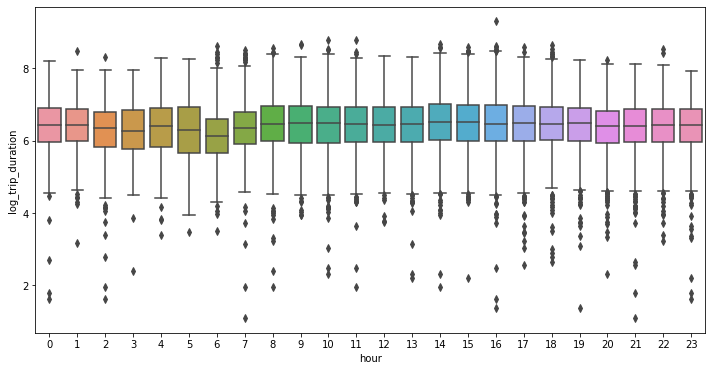

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(train['hour'], train['log_trip_duration'], data = train)
#plt.xlabel('Hour')
#plt.ylabel('Trip Spend')
plt.title('')
plt.show()

C:\Users\Ivy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


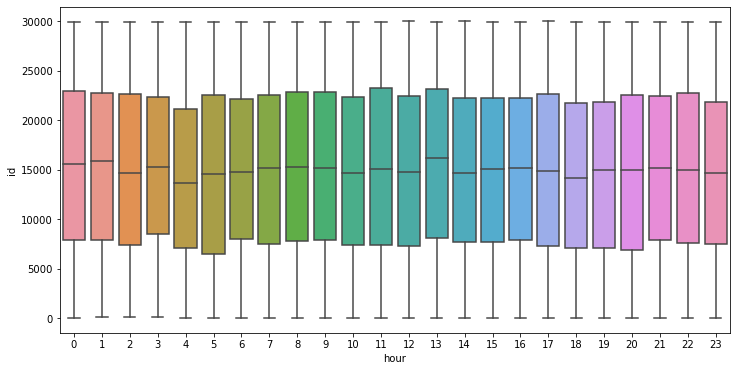

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(train['hour'], train['id'], data = train)
#plt.xlabel('Hour')
#plt.ylabel('Trip of Orders')
plt.title('')
plt.show()

In [30]:
for df in (train, test):
    df['hour_category'] = np.nan
    df.loc[(df.weekend == False)&(df.hour>=7 )& (df.hour<=9), 'hour_category'] = 'morning_peak'
    df.loc[(df.weekend  == False)&(df.hour>=17 )& (df.hour<=21), 'hour_category'] = 'evening_peak'
    df.loc[(df.weekend  == False)&(df.hour>9 )& (df.hour<17), 'hour_category'] = 'day'
    df.loc[(df.weekend  == False)&(df.hour<7)|(df.hour>21), 'hour_category'] = 'night'
    df.loc[(df.weekend  == True)&(df.hour>=7 )& (df.hour<=21), 'hour_category'] = 'day'
    df.loc[(df.weekend  == True)&(df.hour<7)|(df.hour>21), 'hour_category'] = 'night'


In [31]:
train.head()

,id,pickup_date,pickup_time,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,pickup_cluster,dropoff_cluster,year,month,day,hour,minute,weekend,hour_category
0,0,2016-01-07,19.533333,1,-73.986389,40.756615,-73.999794,40.761631,520,6.255750,4,4,2016,1,7,19,32,False,evening_peak
1,1,2016-01-27,8.116667,1,-73.956039,40.767609,-73.968201,40.786690,989,6.897705,0,0,2016,1,27,8,7,False,morning_peak
2,2,2016-01-31,13.866667,1,-73.975998,40.751137,-74.001854,40.735229,657,6.489205,4,2,2016,1,31,13,52,True,day
3,3,2016-01-19,8.000000,3,-73.960121,40.781952,-73.971970,40.755039,1035,6.943122,0,4,2016,1,19,8,0,False,morning_peak
4,4,2016-01-25,23.533333,1,-73.987434,40.760139,-73.990982,40.744862,621,6.432940,4,4,2016,1,25,23,32,False,night


In [32]:
test.head()

,id,pickup_date,pickup_time,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_cluster,dropoff_cluster,year,month,day,hour,minute,weekend,hour_category
0,40000,2016-02-04,19.533333,1,-73.991814,40.743778,-73.971161,40.792728,2,0,2016,2,4,16,33,False,day
1,39999,2016-02-10,8.116667,1,-73.971420,40.763149,-73.948357,40.782139,4,0,2016,2,10,0,2,False,night
2,39998,2016-02-08,13.866667,2,-73.975739,40.758381,-73.783272,40.643829,4,1,2016,2,8,16,49,False,day
3,39997,2016-02-07,8.000000,1,-73.985123,40.741821,-73.989037,40.726898,2,2,2016,2,7,3,52,True,night
4,39996,2016-02-07,23.533333,1,-74.001450,40.733639,-74.012756,40.716217,2,2,2016,2,7,17,56,True,day


In [33]:
pickup_cluster_train = pd.get_dummies(train.pickup_cluster, prefix='pc', prefix_sep='_')
dropoff_cluster_train = pd.get_dummies(train.dropoff_cluster, prefix='dc', prefix_sep='_')
weekend_train = pd.get_dummies(train.weekend, prefix = 'we', prefix_sep= '_')
hour_category_train = pd.get_dummies(train.hour_category, prefix='hc', prefix_sep='_')

pickup_cluster_test = pd.get_dummies(test.pickup_cluster, prefix='pc', prefix_sep='_')
dropoff_cluster_test = pd.get_dummies(test.dropoff_cluster, prefix='dc', prefix_sep='_')
weekend_test = pd.get_dummies(test.weekend, prefix = 'we', prefix_sep= '_')
hour_category_test = pd.get_dummies(test.hour_category, prefix='hc', prefix_sep='_')

In [34]:
dropoff_cluster_train.head()

,dc_0,dc_1,dc_2,dc_3,dc_4
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [35]:
train = train.drop(['id', 'pickup_date', 'pickup_time', 'passenger_count', 'trip_duration', 'pickup_time', 'hour_category','pickup_cluster', 'dropoff_cluster', 'weekend', 'year', 'month'],axis = 1)

In [36]:
Test_id = test['id']
test = test.drop(['id', 'pickup_date', 'pickup_time', 'passenger_count', 'pickup_time', 'hour_category','pickup_cluster', 'dropoff_cluster','weekend', 'year', 'month'], axis = 1)

In [37]:
train.shape, test.shape

((29531, 8), (10000, 7))

In [38]:
Train_master = pd.concat([train,
                          pickup_cluster_train,
                          dropoff_cluster_train,
                          weekend_train,
                          hour_category_train], axis = 1)

Test_master = pd.concat([test,
                         pickup_cluster_test,
                         dropoff_cluster_test,
                         weekend_test,
                         hour_category_test], axis = 1)

Train_master.shape, Test_master.shape


((29531, 24), (10000, 23))

In [39]:
Train, Test = train_test_split(Train_master[0:100000], test_size = 0.2)

In [40]:
X_train = Train.drop(['log_trip_duration'], axis=1)
Y_train = Train["log_trip_duration"]
X_test = Test.drop(['log_trip_duration'], axis=1)
Y_test = Test["log_trip_duration"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [41]:
print(X_train.columns)
print(X_train['pc_0'])

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'day', 'hour', 'minute', 'pc_0', 'pc_1', 'pc_2',
       'pc_3', 'pc_4', 'dc_0', 'dc_1', 'dc_2', 'dc_3', 'dc_4', 'we_False',
       'we_True', 'hc_day', 'hc_evening_peak', 'hc_morning_peak', 'hc_night'],
      dtype='object')
13329    0
5442     0
6410     1
19395    0
10312    1
        ..
2636     1
6444     0
12579    0
26493    1
3619     0
Name: pc_0, Length: 23624, dtype: uint8


In [42]:
# 删除day，hour，min/////TODO:hour
X_train = Train.drop(['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4','log_trip_duration','minute'], axis=1)
X_test = Test.drop(['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4','log_trip_duration','minute'], axis=1)
Test_master = Test_master.drop(['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4','minute'], axis=1)
# Y_test = Test["log_trip_duration"]
print(X_train)
print(Test_master)


       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
13329        -73.990967        40.733521         -73.994072         40.722530   
5442         -73.976395        40.745037         -73.980804         40.778378   
6410         -73.954407        40.764194         -74.006737         40.706497   
19395        -74.003815        40.741783         -73.991806         40.744411   
10312        -73.956284        40.781612         -73.973785         40.754444   
...                 ...              ...                ...               ...   
2636         -73.976562        40.777420         -73.989952         40.752380   
6444         -73.972687        40.764599         -73.956322         40.763130   
12579        -73.968292        40.764992         -73.955643         40.782551   
26493        -73.953613        40.767159         -73.991592         40.726639   
3619         -74.005638        40.736809         -73.990654         40.758575   

       day  hour  dc_0  dc_

In [43]:
# 增加距离：曼哈顿距离
def haversine_dist(lat1,lng1,lat2,lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    radius = 6371  # Earth's radius taken from google
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng/2) ** 2
    h = 2 * radius * np.arcsin(np.sqrt(d))
    return h

def manhattan_dist(lat1, lng1, lat2, lng2):
    '''
    calculating two haversine distances by,
     - avoiding Latitude of one point
     - avoiding Longitude of one point
    and adding it together.
    '''
    a = haversine_dist(lat1, lng1, lat1, lng2)
    b = haversine_dist(lat1, lng1, lat2, lng1)
    return a + b


In [44]:
X_train['manhatten_dist'] = manhattan_dist(X_train['pickup_latitude'],X_train['pickup_longitude']
                                           ,X_train['dropoff_latitude'], X_train['dropoff_longitude'])
X_test['manhatten_dist'] = manhattan_dist(X_test['pickup_latitude'],X_test['pickup_longitude']
                                          ,X_test['dropoff_latitude'], X_test['dropoff_longitude'])
Test_master['manhatten_dist']= manhattan_dist(Test_master['pickup_latitude'],Test_master['pickup_longitude']
                                              ,Test_master['dropoff_latitude'], Test_master['dropoff_longitude'])
# """

X_train['distance'] = X_train.apply(lambda row:
                                    haversine((row['pickup_latitude'],
                                               row['pickup_longitude']),
                                              (row['dropoff_latitude'],
                                               row['dropoff_longitude']), unit='m'), axis=1)
X_test['distance'] = X_test.apply(lambda row:
                                  haversine((row['pickup_latitude'],
                                             row['pickup_longitude']),
                                            (row['dropoff_latitude'],
                                             row['dropoff_longitude']), unit='m'), axis=1)
Test_master['distance'] = Test_master.apply(lambda row:
                                            haversine((row['pickup_latitude'],
                                                       row['pickup_longitude']),
                                                      (row['dropoff_latitude'],
                                                       row['dropoff_longitude']), unit='m'), axis=1)

print(X_train)

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
13329        -73.990967        40.733521         -73.994072         40.722530   
5442         -73.976395        40.745037         -73.980804         40.778378   
6410         -73.954407        40.764194         -74.006737         40.706497   
19395        -74.003815        40.741783         -73.991806         40.744411   
10312        -73.956284        40.781612         -73.973785         40.754444   
...                 ...              ...                ...               ...   
2636         -73.976562        40.777420         -73.989952         40.752380   
6444         -73.972687        40.764599         -73.956322         40.763130   
12579        -73.968292        40.764992         -73.955643         40.782551   
26493        -73.953613        40.767159         -73.991592         40.726639   
3619         -74.005638        40.736809         -73.990654         40.758575   

       day  hour  dc_0  dc_

In [45]:
print(Test_master)

      pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.991814        40.743778         -73.971161         40.792728   
1           -73.971420        40.763149         -73.948357         40.782139   
2           -73.975739        40.758381         -73.783272         40.643829   
3           -73.985123        40.741821         -73.989037         40.726898   
4           -74.001450        40.733639         -74.012756         40.716217   
...                ...              ...                ...               ...   
9995        -73.988716        40.769218         -74.015572         40.704723   
9996        -73.985260        40.778679         -73.956848         40.783600   
9997        -73.979836        40.733414         -74.000282         40.730022   
9998        -74.008911        40.715923         -74.004562         40.712826   
9999        -73.957108        40.770782         -73.969955         40.762451   

      day  hour  dc_0  dc_1  dc_2  dc_3

Xgboost

In [46]:
xgtrain = xgb.DMatrix(X_train, label=Y_train)
xgvalid = xgb.DMatrix(X_test, label=Y_test)
xgtest = xgb.DMatrix(Test_master)
watchlist = [(xgtrain, 'train'), (xgvalid, 'valid')]

In [47]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day,hour,dc_0,dc_1,dc_2,dc_3,dc_4,we_False,we_True,hc_day,hc_evening_peak,hc_morning_peak,hc_night,manhatten_dist,distance
13329,-73.990967,40.733521,-73.994072,40.722530,16,0,0,0,1,0,0,0,1,0,0,0,1,1.483684,1249.748160
5442,-73.976395,40.745037,-73.980804,40.778378,2,22,0,0,0,0,1,0,1,0,0,0,1,4.078786,3725.852037
6410,-73.954407,40.764194,-74.006737,40.706497,21,11,0,0,1,0,0,1,0,1,0,0,0,10.822849,7784.663007
19395,-74.003815,40.741783,-73.991806,40.744411,15,1,0,0,1,0,0,1,0,0,0,0,1,1.303960,1053.053100
10312,-73.956284,40.781612,-73.973785,40.754444,11,13,0,0,0,0,1,1,0,1,0,0,0,4.494582,3361.357325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,-73.976562,40.777420,-73.989952,40.752380,13,7,0,0,0,0,1,1,0,0,0,1,0,3.911723,3003.974424
6444,-73.972687,40.764599,-73.956322,40.763130,22,21,1,0,0,0,0,1,0,0,1,0,0,1.541554,1387.904785
12579,-73.968292,40.764992,-73.955643,40.782551,12,13,1,0,0,0,0,1,0,1,0,0,0,3.017801,2224.139430
26493,-73.953613,40.767159,-73.991592,40.726639,11,15,0,0,1,0,0,1,0,1,0,0,0,7.704023,5525.995588


[18:05:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or som

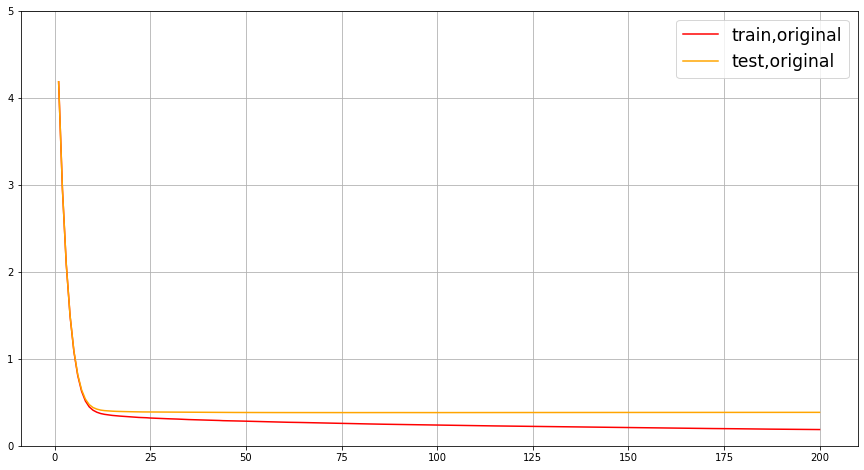

In [48]:
##超参数寻优
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score as CVS

param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200
cvresult1 = xgb.cv(param1, xgtrain, num_round)
print(min(cvresult1.iloc[:,2]))
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

[18:05:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or som

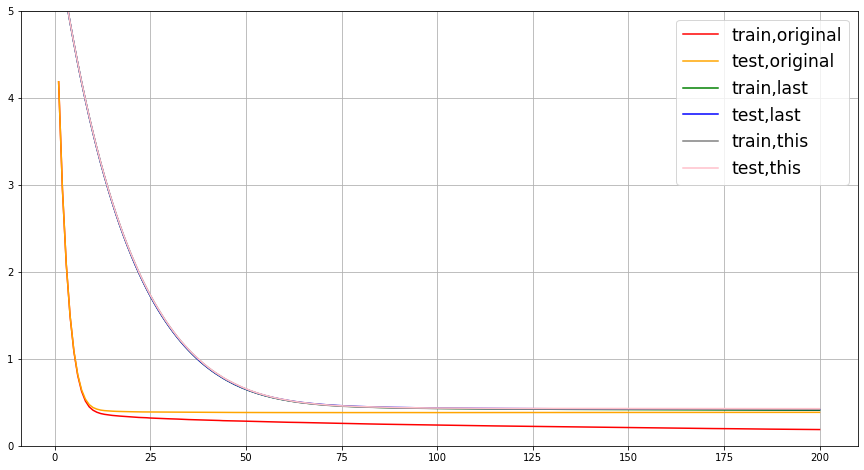

In [49]:
param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

cvresult1 = xgb.cv(param1, xgtrain, num_round)

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1
          ,"nfold":5}

param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          ,"nfold":5}

cvresult2 = xgb.cv(param2, xgtrain, num_round)

cvresult3 = xgb.cv(param3, xgtrain, num_round)
print(min(cvresult2.iloc[:,2]))
print(min(cvresult3.iloc[:,2]))
ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

In [50]:
# trian_final = 

param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          }
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9,
            'max_depth': 10,
            'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
# Test_master = Test_master.drop(['day','minute'], axis=1)
xgtrain_new = pd.concat([X_train,X_test],axis=0)
xgtrain_new = xgb.DMatrix(pd.concat([X_train,X_test],axis=0), label=pd.concat([Y_train,Y_test],axis=0))
# xgtrain = xgb.DMatrix(X_train, label=Y_train)
# xgvalid = xgb.DMatrix(X_test, label=Y_test)

model_final = xgb.train(xgb_pars, xgtrain_new,verbose_eval=1)

# print('Modeling RMSLE %.5f' % model_final.best_score_)
print(model_final)

[18:05:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [51]:
from sklearn.metrics import mean_squared_error
pred = model_final.predict(xgvalid)
# pred = np.exp(pred) - 1

print(np.sqrt(mean_squared_error(pred,Y_test)))

0.27173466510710437


In [52]:
print(model_final.predict(xgtest))

[7.1317067 6.044209  7.9630976 ... 6.4596972 5.5504713 6.35413  ]


In [53]:
pred = model_final.predict(xgtest)
pred = np.exp(pred) - 1
print(pred)

[1250.0103   420.6641  2871.9585  ...  637.8676   256.35883  573.8619 ]


In [54]:
submission = pd.concat([Test_id, pd.DataFrame(pred)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission.to_csv("submission_Xgboost_1.csv", index=False)

Random Forest

In [46]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, Y_train)
y_valid = regressor.predict(X_test)

# performance
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_valid))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_valid))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(Y_test, y_valid)))


C:\Users\Ivy\AppData\Local\Temp/ipykernel_22576/2087472231.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


Mean Absolute Error: 0.3034886524244197
Mean Squared Error: 0.1885288617441145
Root Mean Squared Error: 0.4341991038039053


In [47]:
y_predict = regressor.predict(Test_master)

In [48]:
y_predict

array([6.99918076, 6.2466446 , 8.02279833, ..., 6.17943753, 5.72796689,
       6.34249942])

In [49]:
submission = pd.concat([Test_id, pd.DataFrame(y_predict)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission.to_csv("submission_rf.csv", index=False)

Random Forest Regressor

In [50]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [51]:
rf.fit(X_train,Y_train)

C:\Users\Ivy\AppData\Local\Temp/ipykernel_22576/3127468588.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestRegressor(random_state=42)

In [52]:
valid_pred_rf=rf.predict(X_test)
rmse=mean_squared_error(Y_test,valid_pred_rf)
print("Root Mean Squared Error for Random Forest",rmse)

Root Mean Squared Error for Random Forest 0.19016061723731228


In [53]:
test_pred=rf.predict(Test_master)
submit=pd.DataFrame()
submit['id']=Test_id
submit['trip_duration']=np.exp(test_pred)
submit.to_csv("submission_random_forest_baseline.csv",index=False)